In [1]:
from control import matlab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# 状態遷移行列$e^{At}$の求め方

In [108]:
sp.init_printing()
# pythonで代数学的に解く
s = sp.Symbol('s')
t = sp.Symbol('t', positive=True) #tは正

In [109]:
A = np.array([[0, 1],[-3, -4]])
G = s*sp.eye(2) - A #(sI - A)
exp_At = sp.inverse_laplace_transform(sp.simplify(G.inv()), s, t) #逆ラプラス変換
exp_At

⎡ ⎛   2⋅t    ⎞  -3⋅t    ⎛ 2⋅t    ⎞  -3⋅t ⎤
⎢ ⎝3⋅ℯ    - 1⎠⋅ℯ        ⎝ℯ    - 1⎠⋅ℯ     ⎥
⎢ ──────────────────    ──────────────── ⎥
⎢         2                    2         ⎥
⎢                                        ⎥
⎢  ⎛   2⋅t    ⎞  -3⋅t  ⎛   2⋅t    ⎞  -3⋅t⎥
⎢3⋅⎝- ℯ    + 1⎠⋅ℯ      ⎝- ℯ    + 3⎠⋅ℯ    ⎥
⎢────────────────────  ──────────────────⎥
⎣         2                    2         ⎦

# システムの時間応答の求め方
## 例題2.2

In [92]:
B = np.array([[0],[1]])
C = np.eye(2) #状態量を見たいのでy=xにする
D = np.zeros([2,1])

sys = matlab.ss(A, B, C, D) # 状態空間表現システム　state space?

Td = np.arange(0, 10, 0.01) #シミュレーション時間0~1s,0.01s刻み
Ud = 1*(Td>0) #入力信号（ステップ入力）

X0 = [2, 0] # 初期状態量
x, tt, _ = matlab.lsim(sys, Ud, Td, X0) #線形システムシミュレータ

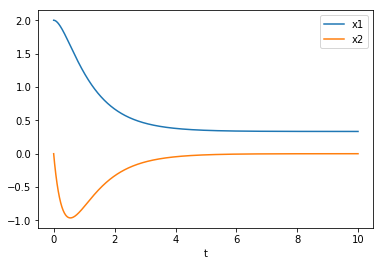

In [93]:
df = pd.concat((pd.DataFrame(tt),pd.DataFrame(x)),axis=1)
df.columns = ["t", "x1", "x2"]
df.plot(x="t")

# 自由システム応答

In [101]:
x, tt = matlab.initial(sys, Td, X0) #制御入力いらん場合はinitial()が使える

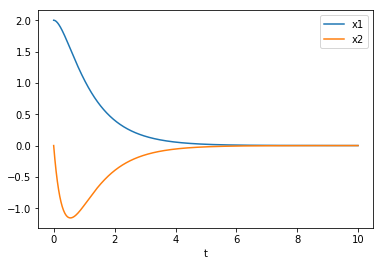

In [102]:
df_f = pd.concat((pd.DataFrame(tt),pd.DataFrame(x)), axis=1)
df_f.columns = ["t","x1","x2"]
df_f.plot(x = "t")

# 固有値、固有ベクトルの求め方

In [90]:
eig_val, eig_vec = np.linalg.eig(A)
print("固有値：", eig_val)
print("（単位）固有ベクトル：", eig_vec)

固有値： [-1. -3.]
（単位）固有ベクトル： [[ 0.70710678 -0.31622777]
 [-0.70710678  0.9486833 ]]


# 演習
## 2.1

In [113]:
in_exp_At = exp_At.inv() #逆行列
sp.simplify(in_exp_At)

⎡⎛   2⋅t    ⎞  t  ⎛   2⋅t    ⎞  t⎤
⎢⎝- ℯ    + 3⎠⋅ℯ   ⎝- ℯ    + 1⎠⋅ℯ ⎥
⎢───────────────  ───────────────⎥
⎢       2                2       ⎥
⎢                                ⎥
⎢  ⎛ 2⋅t    ⎞  t  ⎛   2⋅t    ⎞  t⎥
⎢3⋅⎝ℯ    - 1⎠⋅ℯ   ⎝3⋅ℯ    - 1⎠⋅ℯ ⎥
⎢───────────────  ───────────────⎥
⎣       2                2       ⎦

In [114]:
A = -np.array([[0, 1],[-3, -4]]) #Aにマイナスかけたやつ
G = s*sp.eye(2) - A
exp_At = sp.inverse_laplace_transform(sp.simplify(G.inv()), s, t)
exp_At

⎡⎛   2⋅t    ⎞  t  ⎛   2⋅t    ⎞  t⎤
⎢⎝- ℯ    + 3⎠⋅ℯ   ⎝- ℯ    + 1⎠⋅ℯ ⎥
⎢───────────────  ───────────────⎥
⎢       2                2       ⎥
⎢                                ⎥
⎢  ⎛ 2⋅t    ⎞  t  ⎛   2⋅t    ⎞  t⎥
⎢3⋅⎝ℯ    - 1⎠⋅ℯ   ⎝3⋅ℯ    - 1⎠⋅ℯ ⎥
⎢───────────────  ───────────────⎥
⎣       2                2       ⎦